In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

In [3]:
data = pd.read_csv('curs.csv')

In [4]:
data.head()

,Банк,доллар продажа,доллар покупка,евро продажа,евро покупка
0,"Абсолют Банк(Белинского, 61) 228-30-80",57.70,56.70,71.00,70.00
1,"Авангард банк(Бабушкина, 2-а) 311-22-99\n(доб....",57.75,55.95,71.05,69.25
2,"Авангард банк(Маршала Жукова, 6) 311-22-01",58.15,56.35,71.25,69.85
3,Банк АГРОПРОМКРЕДИТ 371-17-56,58.00,56.50,71.50,69.50
4,"Банк НЕЙВА(Академика Шварца, 14) 222-11-00",57.54,57.35,70.93,70.70


In [5]:
prices = pd.DataFrame(data, columns=['доллар продажа', 'доллар покупка', 
                                     'евро продажа', 'евро покупка'])
prices.head()

,доллар продажа,доллар покупка,евро продажа,евро покупка
0,57.70,56.70,71.00,70.00
1,57.75,55.95,71.05,69.25
2,58.15,56.35,71.25,69.85
3,58.00,56.50,71.50,69.50
4,57.54,57.35,70.93,70.70


Нарисуем гистограммы курсов купли/продажи

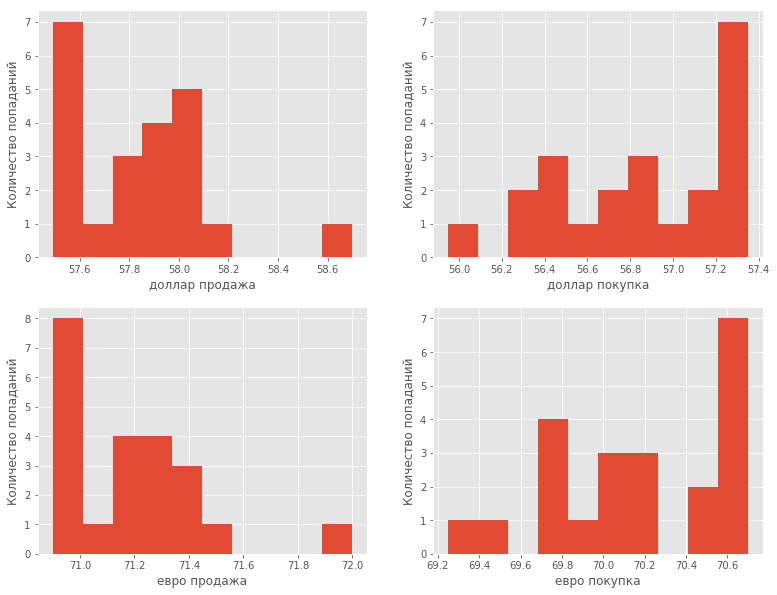

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10))
j = 0 
k = 0
for i in prices:
    axs[j, k].hist(prices[i])
    axs[j, k].set_xlabel(i)
    axs[j, k].set_ylabel('Количество попаданий')
    k += 1
    if k % 2 == 0:
        j = 1
        k = 0
plt.show()

# Вычисление симметрии

In [7]:
for i in prices:
    N = len(prices[i])
    xi = prices[i]
    Ax = np.sum((xi - xi.mean())**3) / N
    sigma = np.sqrt(np.sum((xi - xi.mean())**2) / N)
    Ax = Ax / sigma**3 
    print("Коэфф симметрии {}: {}".format(i, Ax))

Коэфф симметрии доллар продажа: 1.0225870797172465
Коэфф симметрии доллар покупка: -0.43775407940276123
Коэфф симметрии евро продажа: 1.301880261180435
Коэфф симметрии евро покупка: -0.35375786912466567


# Вычисление эксцесса

In [8]:
for i in prices:
    N = len(prices[i])
    xi = prices[i]
    Ax = np.sum((xi - xi.mean())**4) / N
    sigma = np.sqrt(np.sum((xi - xi.mean())**2) / N)
    Ax = Ax / sigma**4 - 3 
    print("Коэфф эксцесса {}: {}".format(i, Ax))

Коэфф эксцесса доллар продажа: 1.6086092196026458
Коэфф эксцесса доллар покупка: -0.8191958658350758
Коэфф эксцесса евро продажа: 2.237514660393834
Коэфф эксцесса евро покупка: -0.9673113609499535


# Часть 2
Имеется выборочная совокупность из 400 реализаций СВ с треугольным распределением от 0 до 2. Определить параметры теоретического распределения (варианты: равномерное, нормальное), которое оптимальным образом приближает данную выборку.
Использовать два метода:
А. Метод наименьших квадратов 
Б. Систему уравнений для числовых характеристик выборки

[0.54586616 1.08763609 1.49709029 1.05681009 1.53573853]


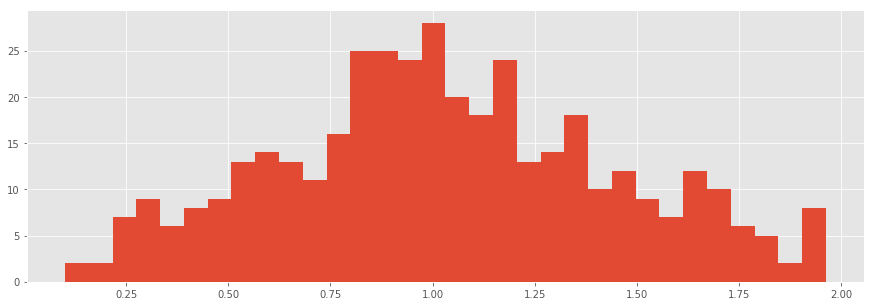

In [19]:
distr = np.random.triangular(0, 1, 2, 400)
print(distr[0:5])
plt.hist(distr, bins=32)
plt.show()

Считаем характеристки распределения

In [38]:
mean = distr.mean()
D = np.var(distr)
avg = np.sqrt(D)
Ax = 1/np.sqrt(avg)**3 * np.sum((distr - mean)**3)/distr.size
Ex = 1/np.sqrt(avg)**4 * np.sum((distr - mean)**4)/distr.size - 3

-2.5810150914636356


y = 0.7040846053331278x + 0.32897595013318087


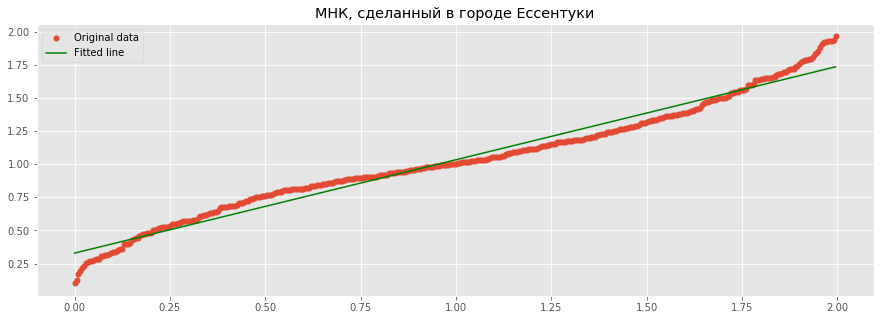

In [116]:
import warnings
warnings.filterwarnings('ignore')

distr.sort()
x = np.arange(0, 2, 2 / distr.size)
x = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(x, distr)[0]
print(f'y = {m}x + {c}')
x_ = x[:,:1]
plt.plot(x_, distr, 'o', label='Original data', markersize=5)
plt.plot(x_, m*x_ + c, 'g', label='Fitted line')
plt.title('МНК, сделанный в городе Ессентуки')
plt.legend()
plt.show()

С помощью вероятностоного калькулятора, который мы позаимствовали в краеведческом музее города Череповец, мы нашли искомые значения и они сошлись с нашими. Мы решили, что они лежат в пределах статистической погрешности.